In [85]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
dfAll = pd.read_csv('./../out/Allevent.txt',encoding='utf-16',index_col=0)
eventLabel=pd.DataFrame()
eventLabel['eventidx']=dfAll.index
eventLabel['pos']=dfAll['valence'].map(lambda x: 1 if x >0 else 0)
eventLabel['high']=dfAll['arousal'].map(lambda x: 1 if x >1 else 0)
eventLabel.set_index('eventidx',inplace=True)

def threepart(x):
    if x<-1:
        return 0
    elif x>-2 and x<2:
        return 2
    else:
        return 1
eventLabel['pos_h']=dfAll['valence'].map(threepart)
eventLabel['high_h']=dfAll['arousal'].map(threepart)
eventLabel['emotions']=dfAll['emotions']
eventLabel['event']=dfAll['event']

phyEventdf20=pd.read_csv('./../out/feature/phyEvent20s.csv',encoding='utf-16',index_col='eventidx')
featureTrans20=phyEventdf20.groupby('sujet').transform(lambda x: (x - x.mean()) / x.std())
phyEventNormdf20=pd.concat([phyEventdf20['sujet'], featureTrans20], axis=1)
phyEventNormdf20n=phyEventNormdf20.dropna(axis=1,how='any')
phydf=phyEventNormdf20n
y_ar=eventLabel.iloc[18:,1]

fea_rank=pd.read_csv('./../out/fearank.csv',encoding='utf-8')

X=phydf.join(y_ar,how='inner')
X.head()

,sujet,ECG_raw_mean,ECG_raw_median,ECG_raw_max,ECG_raw_min,ECG_raw_vrange,ECG_raw_var,ECG_raw_stddev,ECG_raw_avgder,ECG_raw_maxgra,...,Resp_Ampup_mean,Resp_Ampup_max,Resp_Ampup_min,Resp_Ampup_vrange,Resp_Ampup_avgder,Resp_Ampup_maxgra,Resp_Ampup_absdev,Resp_Ampup_kurtosis,Resp_Ampup_skewness,high
eventidx,,,,,,,,,,,,,,,,,,,,,
18,2,-0.676255,0.017119,-1.789465,0.489156,-1.369097,-1.972292,-1.992517,0.646479,-2.047862,...,-0.449223,-0.754732,-0.103999,-0.938180,-0.123218,-0.731820,-0.953438,2.560772,-2.520112,1
19,2,-0.094325,-0.983920,-2.077616,0.630765,-1.632249,-1.873250,-1.886956,-0.115413,-2.066838,...,-0.608117,-0.718555,-0.559278,-0.644232,-0.127995,-0.624444,-0.706549,0.614415,-0.995620,1
20,2,0.071147,-0.768972,-2.216446,0.570811,-1.671956,-1.680142,-1.682600,-0.228325,-2.206339,...,-0.284586,-0.264912,-0.205224,-0.238035,0.792475,-0.389146,-0.023452,-0.962222,0.307639,1
21,2,0.076285,-0.311708,-2.147545,0.644436,-1.682052,-2.011211,-2.034140,-0.085891,-2.030301,...,-0.940244,-1.060074,-0.638381,-1.051429,-0.266165,-0.874688,-0.940169,-0.781403,-0.804197,0
22,2,-0.085260,-0.732947,-1.974493,0.588749,-1.543958,-2.266504,-2.309191,0.191727,-1.783428,...,-0.949861,-1.049494,-0.581031,-1.068513,-0.392518,-0.851201,-1.000337,0.059458,0.631071,1


In [12]:
fea_rank=pd.read_csv('./../out/fearank.csv',encoding='utf-8',header=None,index_col=0,names=['feature','fre'])
fea_rank.head()

,fre
feature,
sfEMG_raw_avgder,20
sfEMG_raw_mean,18
Resp_Ampup_kurtosis,16
fEMG_raw_maxgra,16
fEMG_raw_mean,16


In [18]:
X.groupby('sujet').get_group(6)

,sujet,ECG_raw_mean,ECG_raw_median,ECG_raw_max,ECG_raw_min,ECG_raw_vrange,ECG_raw_var,ECG_raw_stddev,ECG_raw_avgder,ECG_raw_maxgra,...,Resp_Ampup_mean,Resp_Ampup_max,Resp_Ampup_min,Resp_Ampup_vrange,Resp_Ampup_avgder,Resp_Ampup_maxgra,Resp_Ampup_absdev,Resp_Ampup_kurtosis,Resp_Ampup_skewness,high
eventidx,,,,,,,,,,,,,,,,,,,,,
186,6,0.048686,-0.761819,-1.385549,0.878750,-1.353580,-0.667655,-0.654372,0.992836,-0.655681,...,-0.137711,-0.554958,0.601292,-0.956595,-0.140181,-0.810583,-0.947020,-0.105367,0.309389,0
187,6,-0.083060,-0.890883,-1.586246,1.329613,-1.645811,-0.815980,-0.807157,-2.164646,-1.298154,...,-0.184911,-0.609211,0.304502,-0.841630,-0.620516,-0.830932,-0.937329,2.164709,-1.847495,1
188,6,-0.795177,-0.203731,-0.263789,0.169003,-0.258208,-1.721638,-1.764006,0.544004,-0.383357,...,0.029389,-0.394274,0.666327,-0.819832,-0.334229,-0.621226,-0.734750,-0.579029,-0.339058,0
189,6,-0.147244,-1.165603,0.390703,-0.008150,0.310468,-0.873533,-0.866726,-0.787321,-0.461546,...,-0.200761,-0.490198,0.131091,-0.610416,0.200766,-0.125619,-0.498816,-0.585824,-0.299001,0
190,6,-0.054739,0.820102,-1.641316,1.423091,-1.717011,-1.955737,-2.018472,1.084824,-1.326139,...,-0.252497,-0.216625,-0.412325,0.005974,0.220609,0.765050,0.104276,-0.278919,-0.059340,0
191,6,-0.069501,-2.581138,-0.925940,0.846472,-0.981613,0.393376,0.409359,-0.330911,-0.780253,...,0.041817,0.053482,0.158484,-0.034711,-0.267967,-0.266711,0.181755,-0.564515,0.390534,0
192,6,0.094402,1.426181,-0.709942,0.628791,-0.746618,-0.584841,-0.569523,-1.728956,-0.542658,...,-0.226227,-0.517030,0.311500,-0.745400,-0.045891,-0.277257,-0.691036,-0.868051,0.415796,0
193,6,-0.074792,0.534837,-0.117352,-0.268007,-0.012876,-0.062085,-0.041193,0.827555,-0.252314,...,-0.543192,-0.570874,-0.131401,-0.544321,0.585950,-0.517463,-0.367992,-0.023325,1.217208,1
194,6,-0.193619,0.710499,-0.368020,0.822798,-0.534691,-0.537194,-0.520851,0.210920,-0.464291,...,-0.716453,-0.629549,-1.609661,0.258559,0.486052,0.638078,0.366297,0.385810,-1.258949,0


In [28]:
from collections import Counter
def sigfeacount(fea_ls):
    cusub=[ele.split('_')[0] for ele in fea_ls] 
    return dict(Counter(cusub))

In [29]:
sigfeacount(fea_rank[:70].index.values)

{u'ECG': 16, u'EDA': 18, u'Resp': 21, u'fEMG': 8, u'sfEMG': 7}

In [30]:
sigfeacount(selectf)

{u'ECG': 2, u'EDA': 8, u'Resp': 7, u'fEMG': 2, u'sfEMG': 1}

In [31]:
nb_feabase=70
cmpsigfeature=pd.DataFrame()
for sujet, Xnn in X.groupby('sujet'): 
    print(sujet)
    y=Xnn.high
    Xn=Xnn.drop(['high','sujet'],axis=1)
    Xn=Xn.dropna(axis=1,how='any')
    if len(Xn)<20: 
        continue
    else:
        #classification rate without feature selection:
        svc = SVC(kernel="linear", C=1)
        Xn1=Xn[fea_rank.index[:nb_feabase]]
        score_o = cross_val_score(svc, Xn1, y, cv=5)
        # Create the RFE object and rank each pixel
        rfe = RFE(estimator=svc, n_features_to_select=20, step=5)
        rfe.fit(Xn1, y)
        selectf=Xn1.columns.values[rfe.get_support()]
        Xnn=Xn1[selectf]
        score_s = cross_val_score(svc, Xnn, y, cv=5)
        ncmp=pd.DataFrame(sigfeacount(selectf),index=[sujet])
        ncmp['nevent']=len(Xnn)
        ncmp['score_o_mean']=score_o.mean()
        ncmp['score_o_std']=score_o.std()
        ncmp['score_s_mean']=score_s.mean()
        ncmp['score_s_std']=score_s.std()
        cmpsigfeature=cmpsigfeature.append(ncmp)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [35]:
cmpsigfeature.fillna(0,inplace=True)

In [36]:
cmpsigfeature.head()

,ECG,EDA,Resp,fEMG,nevent,score_o_mean,score_o_std,score_s_mean,score_s_std,sfEMG
2,6.0,7,6,0.0,47,0.558889,0.213657,0.817778,0.171068,1.0
3,3.0,3,7,4.0,46,0.740000,0.084795,0.911111,0.129577,3.0
4,6.0,4,6,2.0,32,0.880952,0.060234,0.971429,0.057143,2.0
5,6.0,4,6,2.0,43,0.600000,0.268656,0.905556,0.092296,2.0
6,5.0,6,4,3.0,20,0.536667,0.209072,0.900000,0.122474,2.0


In [40]:
dfclu=cmpsigfeature[['ECG','EDA','Resp','fEMG','sfEMG']]/20

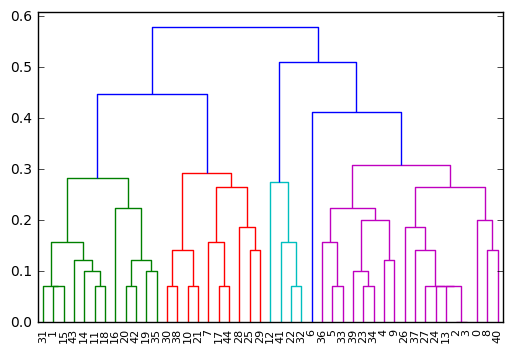

In [44]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


# generate the linkage matrix
Z = linkage(dfclu, method='complete')
c, coph_dists = cophenet(Z, pdist(dfclu))
#c
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [54]:
from scipy.cluster.hierarchy import fcluster
k=4
cluster=fcluster(Z, k, criterion='maxclust')

In [55]:
dfclu['cluster']=cluster

In [74]:
dfclu.columns.values

array([u'ECG', u'EDA', u'Resp', u'fEMG', u'sfEMG', 'cluster'], dtype=object)

cluster1
cluster2
cluster3
cluster4


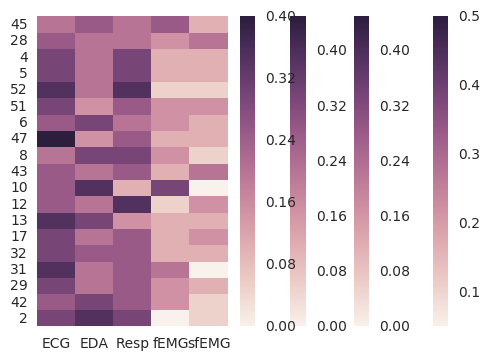

In [69]:
for cl, mat in dfclu.groupby('cluster'):
    print('cluster'+str(cl))
    ax = sns.heatmap(mat.drop('cluster',axis=1))

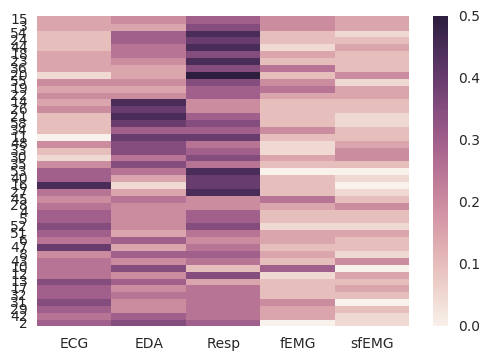

In [66]:
dfclu=dfclu.sort_values(by='cluster')
ax = sns.heatmap(dfclu.drop('cluster',axis=1),row=)

In [78]:
dfclux=dfclu.groupby('cluster')[[u'ECG', u'EDA', u'Resp', u'fEMG', u'sfEMG']].mean()

ValueError: num must be 1 <= num <= 1, not 2

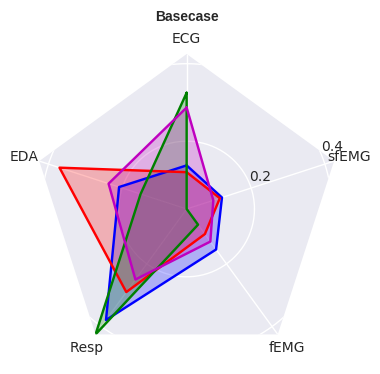

In [110]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase speciesis present...
    data = [
        [u'ECG', u'EDA', u'Resp', u'fEMG', u'sfEMG'],
        ('Basecase', np.array(dfclux)),
        ('With CO', [
            ]),
        ('With O3', [
            ]),
        ('CO & O3', [
            ])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig = plt.figure(figsize=(4, 4))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm']
    # Plot the four cases from the example data on separate axes
    for n, (title, case_data) in enumerate(data):
        ax = fig.add_subplot(1, 1, n + 1, projection='radar')
        plt.rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    #plt.subplot(2, 2, 1)
    #labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    #legend = plt.legend(labels, loc=(0.9, .95), labelspacing=0.1)
    #plt.setp(legend.get_texts(), fontsize='small')

    plt.figtext(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
                ha='center', color='black', weight='bold', size='large')
    plt.show()